In [1]:
import pandas as pd

df = pd.read_excel('./../data/adjmatrix.xlsx')

In [2]:
df = df.dropna(axis=0, thresh=3)
df = df.dropna(axis=1, thresh=3)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df[df < 0.5] = 0

In [68]:
from ipycytoscape import CytoscapeWidget
import networkx as nx

cyto = CytoscapeWidget()
graph = nx.from_numpy_matrix(df.values)
graph = nx.relabel_nodes(graph, dict(enumerate(df.columns)))
nodes_of_largest_component  = max(nx.connected_components(graph), key = len)
print(len(nodes_of_largest_component))
g = graph.subgraph(nodes_of_largest_component)

for node in g.nodes(data=True):
    node[1]["classes"] = 'class1'
    
for s, t, data in g.edges(data=True):
    g[s][t]['classes'] = 'class1'
    
cyto.graph.add_graph_from_networkx(graph)
cyto.set_style(
    [
        {
             'selector': 'node.class1',
             'style': {
                 'background-color': 'green'
             }
        },
        {
             'selector': 'edge.class1',
             'style': {
                 'line-color': '#A0FFA0'
             }
        }
    ]
)
display(cyto)

323


In [69]:
cyto_largest = CytoscapeWidget()
cyto_largest.graph.add_graph_from_networkx(g)
cyto_largest.set_style(
    [
        {
             'selector': 'node',
             'style': {
                 'background-color': 'green'
             }
        },
        {
             'selector': 'edge',
             'style': {
                 'line-color': '#A0FFA0'
             }
        }
    ]
)
display(cyto_largest)

In [5]:
from cdlib import algorithms, viz

# Value of k = ?
#coms = algorithms.async_fluid(g, k=?)
#pos = nx.spring_layout(g)
#viz.plot_network_clusters(g, coms, pos)

In [6]:
# from cdlib import evaluation

# m1 = evaluation.erdos_renyi_modularity(g, coms)
# m2 = evaluation.link_modularity(g, coms)
# m3 = evaluation.modularity_density(g, coms)
# m4 = evaluation.newman_girvan_modularity(g, coms)
# m5 = evaluation.z_modularity(g, coms)

# print(m1.score)
# print(m2.score)
# print(m3.score)
# print(m4.score)
# print(m5.score)

In [7]:
# ae = evaluation.avg_embeddedness(g, coms)
# aid = evaluation.average_internal_degree(g, coms)
# at = evaluation.avg_transitivity(g, coms)
# c = evaluation.conductance(g, coms)
# cr = evaluation.cut_ratio(g, coms)
# ei = evaluation.edges_inside(g, coms)
# ex = evaluation.expansion(g, coms)
# fomd = evaluation.fraction_over_median_degree(g, coms)
# ied = evaluation.internal_edge_density(g, coms)
# nc = evaluation.normalized_cut(g, coms)
# modf = evaluation.max_odf(g, coms)
# aodf = evaluation.avg_odf(g, coms)
# fodf = evaluation.flake_odf(g, coms)
# sd = evaluation.scaled_density(g, coms)
# sz = evaluation.size(g, coms)
# tpr = evaluation.triangle_participation_ratio(g, coms)

# print(ae.score)
# print(aid.score)
# print(at.score)
# print(c.score)
# print(cr.score)
# print(ei.score)
# print(ex.score)
# print(fomd.score)
# print(ied.score)
# print(nc.score)
# print(modf.score)
# print(aodf.score)
# print(fodf.score)
# print(sd.score)
# print(sz.score)
# print(tpr.score)

In [ ]:
# bc = nx.betweenness_centrality(coms)
# dc = nx.degree_centrality(coms)
# cc = nx.closeness_centrality(coms)
# ev = nx.eigenvector_centrality(coms)

# print(bc)
# print(dc)
# print(cc)
# print(ev)

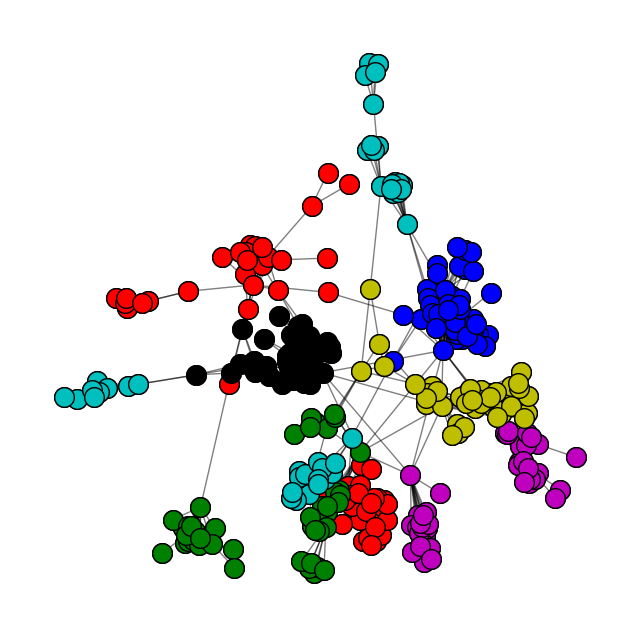

In [70]:
coms = algorithms.belief(g)
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, coms, pos)

In [71]:
from cdlib import evaluation

m1 = evaluation.erdos_renyi_modularity(g, coms)
m2 = evaluation.link_modularity(g, coms)
m3 = evaluation.modularity_density(g, coms)
m4 = evaluation.newman_girvan_modularity(g, coms)
m5 = evaluation.z_modularity(g, coms)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

0.8288587589446571
0.10707306640050138
57.36444336098523
0.8322230194691961
2.342025181674074


In [72]:
ae = evaluation.avg_embeddedness(g, coms)
aid = evaluation.average_internal_degree(g, coms)
at = evaluation.avg_transitivity(g, coms)
c = evaluation.conductance(g, coms)
cr = evaluation.cut_ratio(g, coms)
ei = evaluation.edges_inside(g, coms)
ex = evaluation.expansion(g, coms)
fomd = evaluation.fraction_over_median_degree(g, coms)
ied = evaluation.internal_edge_density(g, coms)
nc = evaluation.normalized_cut(g, coms)
modf = evaluation.max_odf(g, coms)
aodf = evaluation.avg_odf(g, coms)
fodf = evaluation.flake_odf(g, coms)
sd = evaluation.scaled_density(g, coms)
sz = evaluation.size(g, coms)
tpr = evaluation.triangle_participation_ratio(g, coms)

print(ae.score)
print(aid.score)
print(at.score)
print(c.score)
print(cr.score)
print(ei.score)
print(ex.score)
print(fomd.score)
print(ied.score)
print(nc.score)
print(modf.score)
print(aodf.score)
print(fodf.score)
print(sd.score)
print(sz.score)
print(tpr.score)

0.9795591093912412
8.444996875223
0.7496173565558346
0.02959509639317614
0.0009058798362956699
194.28571428571428
0.25007639508225216
0.4498328567076901
0.1895791206270108
0.03442184018702833
5.285714285714286
0.25007639508225216
0.0
7.036890085629153
46.142857142857146
0.908175624840135


In [94]:
bc = nx.betweenness_centrality(g)
dc = nx.degree_centrality(g)
cc = nx.closeness_centrality(g)
ev = nx.eigenvector_centrality(g, max_iter=1000)

print("Betweenness Centrality")
print(sorted(((v, f"{c:0.2f}") for v, c in bc.items()), key=lambda x: x[1], reverse=True)
)
print("\nDegree Centrality")
print(sorted(((v, f"{c:0.2f}") for v, c in dc.items()), key=lambda x: x[1], reverse=True)
)
print("\nCloseness Centrality")
print(sorted(((v, f"{c:0.2f}") for v, c in cc.items()), key=lambda x: x[1], reverse=True)
)
print("\nEigenvector Centrality")
print(sorted(((v, f"{c:0.2f}") for v, c in ev.items()), key=lambda x: x[1], reverse=True)
)

Betweenness Centrality
[('DOID.863', '0.55'), ('DOID.77', '0.33'), ('DOID.12217', '0.24'), ('DOID.1307', '0.24'), ('DOID.417', '0.22'), ('DOID.1287', '0.21'), ('DOID.1289', '0.17'), ('DOID.17', '0.15'), ('DOID.150', '0.14'), ('DOID.437', '0.13'), ('DOID.3635', '0.13'), ('DOID.1579', '0.12'), ('DOID.8505', '0.12'), ('DOID.14330', '0.11'), ('DOID.2723', '0.11'), ('DOID.12858', '0.10'), ('DOID.12899', '0.07'), ('DOID.1561', '0.07'), ('DOID.331', '0.07'), ('DOID.0050736', '0.06'), ('DOID.12236', '0.05'), ('DOID.11823', '0.05'), ('DOID.409', '0.05'), ('DOID.5082', '0.04'), ('DOID.10854', '0.04'), ('DOID.0080001', '0.04'), ('DOID.790', '0.04'), ('DOID.0060260', '0.04'), ('DOID.7188', '0.04'), ('DOID.9335', '0.04'), ('DOID.0060056', '0.03'), ('DOID.10302', '0.03'), ('DOID.0060037', '0.03'), ('DOID.3021', '0.03'), ('DOID.2237', '0.02'), ('DOID.3688', '0.02'), ('DOID.633', '0.02'), ('DOID.630', '0.02'), ('DOID.8466', '0.02'), ('DOID.870', '0.02'), ('DOID.114', '0.02'), ('DOID.50', '0.02'), ('DO

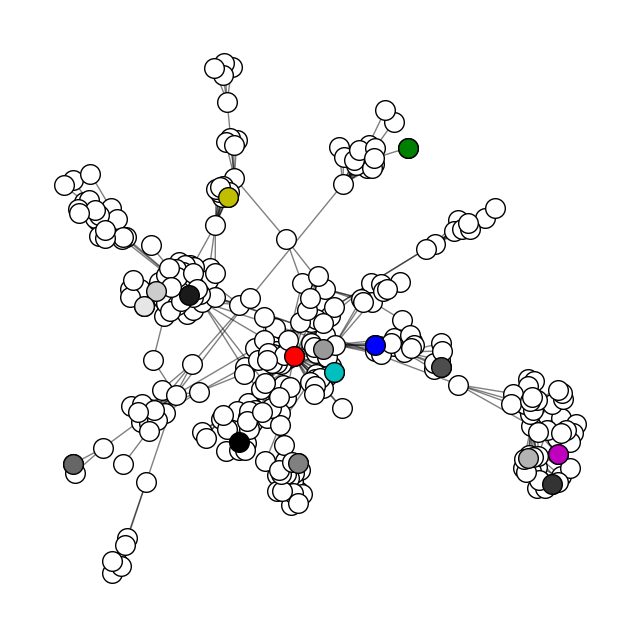

In [11]:
coms = algorithms.cpm(g)
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, coms, pos)

In [12]:
m1 = evaluation.erdos_renyi_modularity(g, coms)
m2 = evaluation.link_modularity(g, coms)
m3 = evaluation.modularity_density(g, coms)
m4 = evaluation.newman_girvan_modularity(g, coms)
m5 = evaluation.z_modularity(g, coms)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

0.2305496074232691
0.0
-1510.0
0.32285763925124483
3.4316485879321283


In [13]:
ae = evaluation.avg_embeddedness(g, coms)
aid = evaluation.average_internal_degree(g, coms)
at = evaluation.avg_transitivity(g, coms)
c = evaluation.conductance(g, coms)
cr = evaluation.cut_ratio(g, coms)
ei = evaluation.edges_inside(g, coms)
ex = evaluation.expansion(g, coms)
fomd = evaluation.fraction_over_median_degree(g, coms)
ied = evaluation.internal_edge_density(g, coms)
nc = evaluation.normalized_cut(g, coms)
modf = evaluation.max_odf(g, coms)
aodf = evaluation.avg_odf(g, coms)
fodf = evaluation.flake_odf(g, coms)
sd = evaluation.scaled_density(g, coms)
sz = evaluation.size(g, coms)
tpr = evaluation.triangle_participation_ratio(g, coms)

print(ae.score)
print(aid.score)
print(at.score)
print(c.score)
print(cr.score)
print(ei.score)
print(ex.score)
print(fomd.score)
print(ied.score)
print(nc.score)
print(modf.score)
print(aodf.score)
print(fodf.score)
print(sd.score)
print(sz.score)
print(tpr.score)

0.30818844445613386
2.0
0.0
0.6918115555438661
0.02072957329384843
1.0
6.674922600619195
0.0
0.0
0.6941859048707258
6.674922600619195
6.674922600619195
0.8328173374613003
0.0
1.0
0.0


In [ ]:
bc = nx.betweenness_centrality(coms)
dc = nx.degree_centrality(coms)
cc = nx.closeness_centrality(coms)
ev = nx.eigenvector_centrality(coms)

print(bc)
print(dc)
print(cc)
print(ev)

In [14]:
# Frozen graph can't be modified
# coms = algorithms.chinesewhispers(g)
# pos = nx.spring_layout(g)
# viz.plot_network_clusters(g, coms, pos)

In [15]:
# m1 = evaluation.erdos_renyi_modularity(g, coms)
# m2 = evaluation.link_modularity(g, coms)
# m3 = evaluation.modularity_density(g, coms)
# m4 = evaluation.newman_girvan_modularity(g, coms)
# m5 = evaluation.z_modularity(g, coms)

# print(m1.score)
# print(m2.score)
# print(m3.score)
# print(m4.score)
# print(m5.score)

In [16]:
# ae = evaluation.avg_embeddedness(g, coms)
# aid = evaluation.average_internal_degree(g, coms)
# at = evaluation.avg_transitivity(g, coms)
# c = evaluation.conductance(g, coms)
# cr = evaluation.cut_ratio(g, coms)
# ei = evaluation.edges_inside(g, coms)
# ex = evaluation.expansion(g, coms)
# fomd = evaluation.fraction_over_median_degree(g, coms)
# ied = evaluation.internal_edge_density(g, coms)
# nc = evaluation.normalized_cut(g, coms)
# modf = evaluation.max_odf(g, coms)
# aodf = evaluation.avg_odf(g, coms)
# fodf = evaluation.flake_odf(g, coms)
# sd = evaluation.scaled_density(g, coms)
# sz = evaluation.size(g, coms)
# tpr = evaluation.triangle_participation_ratio(g, coms)

# print(ae.score)
# print(aid.score)
# print(at.score)
# print(c.score)
# print(cr.score)
# print(ei.score)
# print(ex.score)
# print(fomd.score)
# print(ied.score)
# print(nc.score)
# print(modf.score)
# print(aodf.score)
# print(fodf.score)
# print(sd.score)
# print(sz.score)
# print(tpr.score)

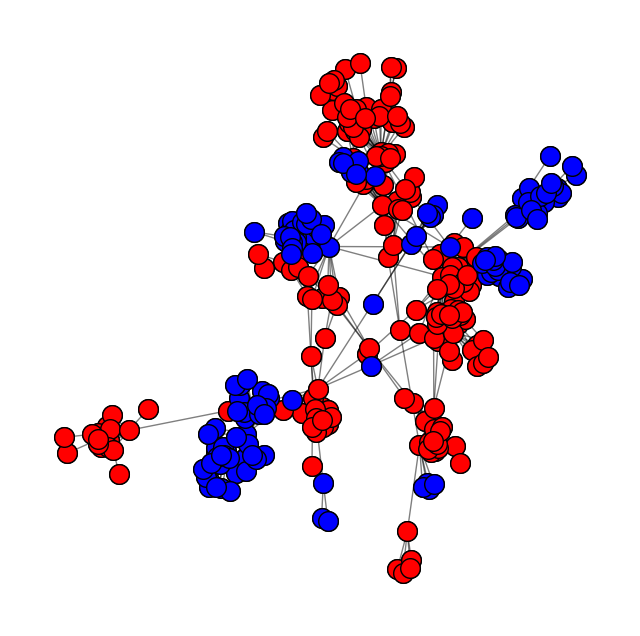

In [17]:
coms = algorithms.der(g)
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, coms, pos)

In [18]:
m1 = evaluation.erdos_renyi_modularity(g, coms)
m2 = evaluation.link_modularity(g, coms)
m3 = evaluation.modularity_density(g, coms)
m4 = evaluation.newman_girvan_modularity(g, coms)
m5 = evaluation.z_modularity(g, coms)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

0.45907012200457387
0.10696962056197075
16.363636363636363
0.46728809299546503
0.923480527419625


In [19]:
ae = evaluation.avg_embeddedness(g, coms)
aid = evaluation.average_internal_degree(g, coms)
at = evaluation.avg_transitivity(g, coms)
c = evaluation.conductance(g, coms)
cr = evaluation.cut_ratio(g, coms)
ei = evaluation.edges_inside(g, coms)
ex = evaluation.expansion(g, coms)
fomd = evaluation.fraction_over_median_degree(g, coms)
ied = evaluation.internal_edge_density(g, coms)
nc = evaluation.normalized_cut(g, coms)
modf = evaluation.max_odf(g, coms)
aodf = evaluation.avg_odf(g, coms)
fodf = evaluation.flake_odf(g, coms)
sd = evaluation.scaled_density(g, coms)
sz = evaluation.size(g, coms)
tpr = evaluation.triangle_participation_ratio(g, coms)

print(ae.score)
print(aid.score)
print(at.score)
print(c.score)
print(cr.score)
print(ei.score)
print(ex.score)
print(fomd.score)
print(ied.score)
print(nc.score)
print(modf.score)
print(aodf.score)
print(fodf.score)
print(sd.score)
print(sz.score)
print(tpr.score)

0.9770721806935869
8.448529411764707
0.7290465646569326
0.030487451037284202
0.001651462724127084
679.5
0.2667112299465241
0.47660427807486627
0.054218497434816215
0.05919678753261853
10.5
0.2667112299465241
0.0
2.012508581086901
161.5
0.8960561497326203


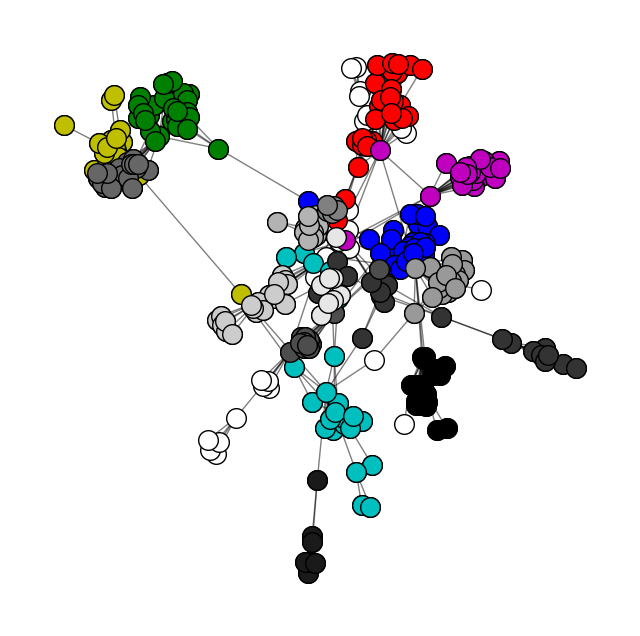

In [20]:
coms = algorithms.eigenvector(g)
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, coms, pos)

In [21]:
m1 = evaluation.erdos_renyi_modularity(g, coms)
m2 = evaluation.link_modularity(g, coms)
m3 = evaluation.modularity_density(g, coms)
m4 = evaluation.newman_girvan_modularity(g, coms)
m5 = evaluation.z_modularity(g, coms)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

0.8397818371072672
0.0966450164688614
122.02863472784526
0.8482318286536179
3.2610074118889814


In [22]:
ae = evaluation.avg_embeddedness(g, coms)
aid = evaluation.average_internal_degree(g, coms)
at = evaluation.avg_transitivity(g, coms)
c = evaluation.conductance(g, coms)
cr = evaluation.cut_ratio(g, coms)
ei = evaluation.edges_inside(g, coms)
ex = evaluation.expansion(g, coms)
fomd = evaluation.fraction_over_median_degree(g, coms)
ied = evaluation.internal_edge_density(g, coms)
nc = evaluation.normalized_cut(g, coms)
modf = evaluation.max_odf(g, coms)
aodf = evaluation.avg_odf(g, coms)
fodf = evaluation.flake_odf(g, coms)
sd = evaluation.scaled_density(g, coms)
sz = evaluation.size(g, coms)
tpr = evaluation.triangle_participation_ratio(g, coms)

print(ae.score)
print(aid.score)
print(at.score)
print(c.score)
print(cr.score)
print(ei.score)
print(ex.score)
print(fomd.score)
print(ied.score)
print(nc.score)
print(modf.score)
print(aodf.score)
print(fodf.score)
print(sd.score)
print(sz.score)
print(tpr.score)

0.8345156549151063
6.166895567320669
0.5918220663851131
0.17931568025446845
0.0046732483854785714
48.42307692307692
1.4734865393266203
0.23079232845427175
0.9671154601808308
0.18342106052577628
5.038461538461538
1.4734865393266203
0.08535762483130904
35.89786243810404
12.423076923076923
0.6930801897907161


In [23]:
#coms = algorithms.em(g, k=?)
#pos = nx.spring_layout(g)
#viz.plot_network_clusters(g, coms, pos)

In [24]:
# m1 = evaluation.erdos_renyi_modularity(g, coms)
# m2 = evaluation.link_modularity(g, coms)
# m3 = evaluation.modularity_density(g, coms)
# m4 = evaluation.newman_girvan_modularity(g, coms)
# m5 = evaluation.z_modularity(g, coms)

# print(m1.score)
# print(m2.score)
# print(m3.score)
# print(m4.score)
# print(m5.score)

In [25]:
# ae = evaluation.avg_embeddedness(g, coms)
# aid = evaluation.average_internal_degree(g, coms)
# at = evaluation.avg_transitivity(g, coms)
# c = evaluation.conductance(g, coms)
# cr = evaluation.cut_ratio(g, coms)
# ei = evaluation.edges_inside(g, coms)
# ex = evaluation.expansion(g, coms)
# fomd = evaluation.fraction_over_median_degree(g, coms)
# ied = evaluation.internal_edge_density(g, coms)
# nc = evaluation.normalized_cut(g, coms)
# modf = evaluation.max_odf(g, coms)
# aodf = evaluation.avg_odf(g, coms)
# fodf = evaluation.flake_odf(g, coms)
# sd = evaluation.scaled_density(g, coms)
# sz = evaluation.size(g, coms)
# tpr = evaluation.triangle_participation_ratio(g, coms)

# print(ae.score)
# print(aid.score)
# print(at.score)
# print(c.score)
# print(cr.score)
# print(ei.score)
# print(ex.score)
# print(fomd.score)
# print(ied.score)
# print(nc.score)
# print(modf.score)
# print(aodf.score)
# print(fodf.score)
# print(sd.score)
# print(sz.score)
# print(tpr.score)

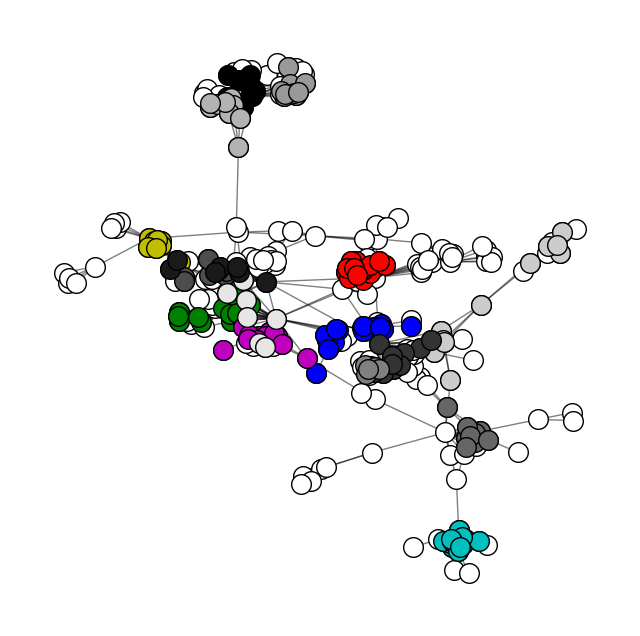

In [26]:
coms = algorithms.ga(g)
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, coms, pos)

In [27]:
m1 = evaluation.erdos_renyi_modularity(g, coms)
m2 = evaluation.link_modularity(g, coms)
m3 = evaluation.modularity_density(g, coms)
m4 = evaluation.newman_girvan_modularity(g, coms)
m5 = evaluation.z_modularity(g, coms)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

0.6425842971805711
0.0627781167915366
40.19141414141413
0.630303836201428
3.467062300358518


In [28]:
ae = evaluation.avg_embeddedness(g, coms)
aid = evaluation.average_internal_degree(g, coms)
at = evaluation.avg_transitivity(g, coms)
c = evaluation.conductance(g, coms)
cr = evaluation.cut_ratio(g, coms)
ei = evaluation.edges_inside(g, coms)
ex = evaluation.expansion(g, coms)
fomd = evaluation.fraction_over_median_degree(g, coms)
ied = evaluation.internal_edge_density(g, coms)
nc = evaluation.normalized_cut(g, coms)
modf = evaluation.max_odf(g, coms)
aodf = evaluation.avg_odf(g, coms)
fodf = evaluation.flake_odf(g, coms)
sd = evaluation.scaled_density(g, coms)
sz = evaluation.size(g, coms)
tpr = evaluation.triangle_participation_ratio(g, coms)

print(ae.score)
print(aid.score)
print(at.score)
print(c.score)
print(cr.score)
print(ei.score)
print(ex.score)
print(fomd.score)
print(ied.score)
print(nc.score)
print(modf.score)
print(aodf.score)
print(fodf.score)
print(sd.score)
print(sz.score)
print(tpr.score)

0.5832667653112732
3.636762101534829
0.2802121040017335
0.44410270636338944
0.00994989054236982
10.579545454545455
3.1800414862914863
0.09782975862521318
1.0741732457975774
0.44793728273049904
5.693181818181818
3.1800414862914863
0.3218893480257117
39.87168543983684
3.6704545454545454
0.31841056670602125


In [29]:
# Value of level = ?
# coms = algorithms.girvan_newman(g, level=?)
# pos = nx.spring_layout(g)
# viz.plot_network_clusters(g, coms, pos)

In [30]:
# m1 = evaluation.erdos_renyi_modularity(g, coms)
# m2 = evaluation.link_modularity(g, coms)
# m3 = evaluation.modularity_density(g, coms)
# m4 = evaluation.newman_girvan_modularity(g, coms)
# m5 = evaluation.z_modularity(g, coms)

# print(m1.score)
# print(m2.score)
# print(m3.score)
# print(m4.score)
# print(m5.score)

In [31]:
# ae = evaluation.avg_embeddedness(g, coms)
# aid = evaluation.average_internal_degree(g, coms)
# at = evaluation.avg_transitivity(g, coms)
# c = evaluation.conductance(g, coms)
# cr = evaluation.cut_ratio(g, coms)
# ei = evaluation.edges_inside(g, coms)
# ex = evaluation.expansion(g, coms)
# fomd = evaluation.fraction_over_median_degree(g, coms)
# ied = evaluation.internal_edge_density(g, coms)
# nc = evaluation.normalized_cut(g, coms)
# modf = evaluation.max_odf(g, coms)
# aodf = evaluation.avg_odf(g, coms)
# fodf = evaluation.flake_odf(g, coms)
# sd = evaluation.scaled_density(g, coms)
# sz = evaluation.size(g, coms)
# tpr = evaluation.triangle_participation_ratio(g, coms)

# print(ae.score)
# print(aid.score)
# print(at.score)
# print(c.score)
# print(cr.score)
# print(ei.score)
# print(ex.score)
# print(fomd.score)
# print(ied.score)
# print(nc.score)
# print(modf.score)
# print(aodf.score)
# print(fodf.score)
# print(sd.score)
# print(sz.score)
# print(tpr.score)

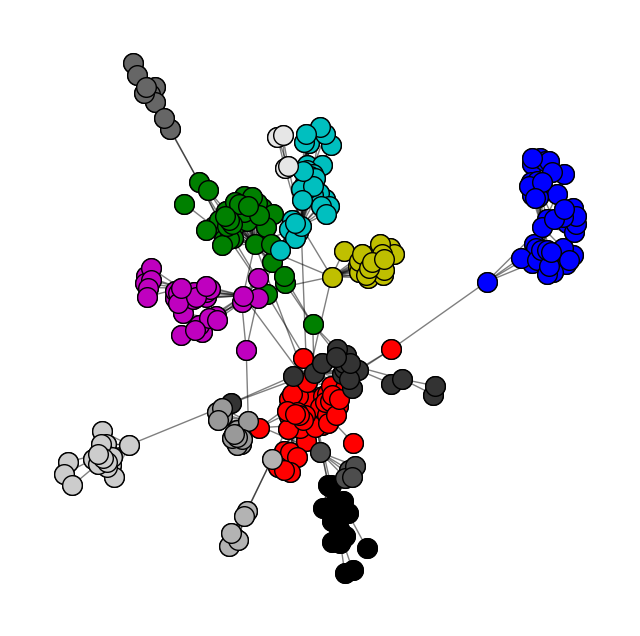

In [32]:
coms = algorithms.greedy_modularity(g)
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, coms, pos)

In [33]:
m1 = evaluation.erdos_renyi_modularity(g, coms)
m2 = evaluation.link_modularity(g, coms)
m3 = evaluation.modularity_density(g, coms)
m4 = evaluation.newman_girvan_modularity(g, coms)
m5 = evaluation.z_modularity(g, coms)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

0.8740507379996182
0.10717625189015946
106.1353735577178
0.867665647205193
2.844998987043929


In [34]:
ae = evaluation.avg_embeddedness(g, coms)
aid = evaluation.average_internal_degree(g, coms)
at = evaluation.avg_transitivity(g, coms)
c = evaluation.conductance(g, coms)
cr = evaluation.cut_ratio(g, coms)
ei = evaluation.edges_inside(g, coms)
ex = evaluation.expansion(g, coms)
fomd = evaluation.fraction_over_median_degree(g, coms)
ied = evaluation.internal_edge_density(g, coms)
nc = evaluation.normalized_cut(g, coms)
modf = evaluation.max_odf(g, coms)
aodf = evaluation.avg_odf(g, coms)
fodf = evaluation.flake_odf(g, coms)
sd = evaluation.scaled_density(g, coms)
sz = evaluation.size(g, coms)
tpr = evaluation.triangle_participation_ratio(g, coms)

print(ae.score)
print(aid.score)
print(at.score)
print(c.score)
print(cr.score)
print(ei.score)
print(ex.score)
print(fomd.score)
print(ied.score)
print(nc.score)
print(modf.score)
print(aodf.score)
print(fodf.score)
print(sd.score)
print(sz.score)
print(tpr.score)

0.9726497740121108
7.854547437176012
0.7461123864994208
0.03614860875837069
0.0009073416637938602
97.21428571428571
0.27344932591045573
0.32476680784332934
0.5904438111329043
0.03839559934252971
3.0
0.27344932591045573
0.0014005602240896359
21.916380806812587
23.071428571428573
0.8916487164511074


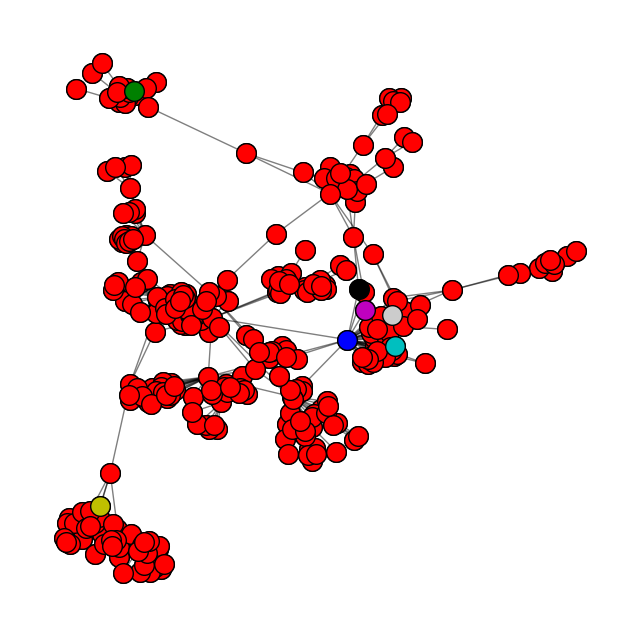

In [35]:
coms = algorithms.kcut(g)
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, coms, pos)

In [36]:
m1 = evaluation.erdos_renyi_modularity(g, coms)
m2 = evaluation.link_modularity(g, coms)
m3 = evaluation.modularity_density(g, coms)
m4 = evaluation.newman_girvan_modularity(g, coms)
m5 = evaluation.z_modularity(g, coms)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

-0.004883153188754609
0.10438813797564607
-49.79746835443038
0.012376700439830727
0.05203433161403451


In [37]:
ae = evaluation.avg_embeddedness(g, coms)
aid = evaluation.average_internal_degree(g, coms)
at = evaluation.avg_transitivity(g, coms)
c = evaluation.conductance(g, coms)
cr = evaluation.cut_ratio(g, coms)
ei = evaluation.edges_inside(g, coms)
ex = evaluation.expansion(g, coms)
fomd = evaluation.fraction_over_median_degree(g, coms)
ied = evaluation.internal_edge_density(g, coms)
nc = evaluation.normalized_cut(g, coms)
modf = evaluation.max_odf(g, coms)
aodf = evaluation.avg_odf(g, coms)
fodf = evaluation.flake_odf(g, coms)
sd = evaluation.scaled_density(g, coms)
sz = evaluation.size(g, coms)
tpr = evaluation.triangle_participation_ratio(g, coms)

print(ae.score)
print(aid.score)
print(at.score)
print(c.score)
print(cr.score)
print(ei.score)
print(ex.score)
print(fomd.score)
print(ied.score)
print(nc.score)
print(modf.score)
print(aodf.score)
print(fodf.score)
print(sd.score)
print(sz.score)
print(tpr.score)

0.32922042268468366
2.7998417721518987
0.08891252633000671
0.6706405350090917
0.03145392719553424
166.75
9.024525316455696
0.055379746835443035
0.0033328310227044404
0.7107344933955408
9.375
9.024525316455696
0.875
0.12370964430670879
40.375
0.11115506329113924


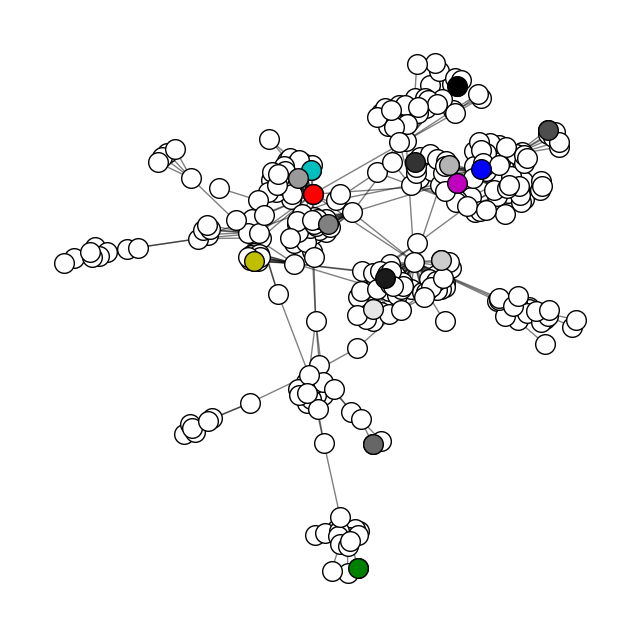

In [38]:
coms = algorithms.label_propagation(g)
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, coms, pos)

In [39]:
m1 = evaluation.erdos_renyi_modularity(g, coms)
m2 = evaluation.link_modularity(g, coms)
m3 = evaluation.modularity_density(g, coms)
m4 = evaluation.newman_girvan_modularity(g, coms)
m5 = evaluation.z_modularity(g, coms)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

0.2305496074232691
0.0
-1510.0
0.2261862002311998
3.4316485879321283


In [40]:
ae = evaluation.avg_embeddedness(g, coms)
aid = evaluation.average_internal_degree(g, coms)
at = evaluation.avg_transitivity(g, coms)
c = evaluation.conductance(g, coms)
cr = evaluation.cut_ratio(g, coms)
ei = evaluation.edges_inside(g, coms)
ex = evaluation.expansion(g, coms)
fomd = evaluation.fraction_over_median_degree(g, coms)
ied = evaluation.internal_edge_density(g, coms)
nc = evaluation.normalized_cut(g, coms)
modf = evaluation.max_odf(g, coms)
aodf = evaluation.avg_odf(g, coms)
fodf = evaluation.flake_odf(g, coms)
sd = evaluation.scaled_density(g, coms)
sz = evaluation.size(g, coms)
tpr = evaluation.triangle_participation_ratio(g, coms)

print(ae.score)
print(aid.score)
print(at.score)
print(c.score)
print(cr.score)
print(ei.score)
print(ex.score)
print(fomd.score)
print(ied.score)
print(nc.score)
print(modf.score)
print(aodf.score)
print(fodf.score)
print(sd.score)
print(sz.score)
print(tpr.score)

0.30818844445613386
2.0
0.0
0.6918115555438661
0.02072957329384843
1.0
6.674922600619195
0.0
0.0
0.6941859048707258
6.674922600619195
6.674922600619195
0.8328173374613003
0.0
1.0
0.0


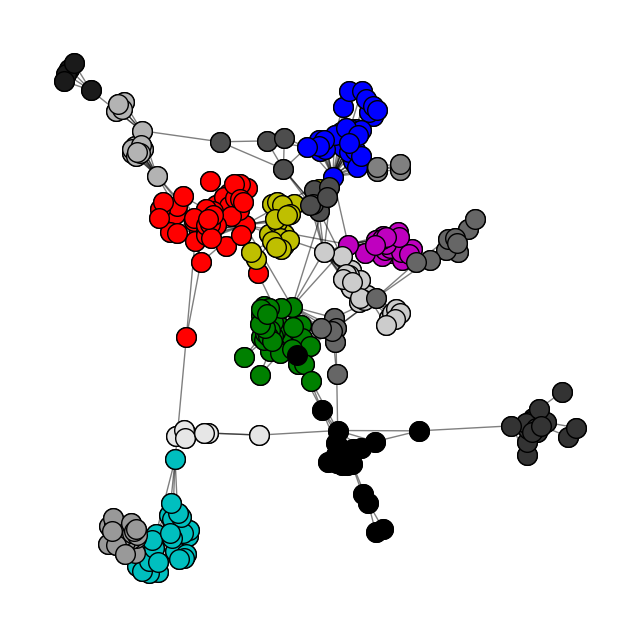

In [41]:
coms = algorithms.leiden(g)
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, coms, pos)

In [42]:
m1 = evaluation.erdos_renyi_modularity(g, coms)
m2 = evaluation.link_modularity(g, coms)
m3 = evaluation.modularity_density(g, coms)
m4 = evaluation.newman_girvan_modularity(g, coms)
m5 = evaluation.z_modularity(g, coms)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

0.8853734526900885
0.1061438357413306
120.10330344258915
0.8774598138069016
3.1157895193227323


In [43]:
ae = evaluation.avg_embeddedness(g, coms)
aid = evaluation.average_internal_degree(g, coms)
at = evaluation.avg_transitivity(g, coms)
c = evaluation.conductance(g, coms)
cr = evaluation.cut_ratio(g, coms)
ei = evaluation.edges_inside(g, coms)
ex = evaluation.expansion(g, coms)
fomd = evaluation.fraction_over_median_degree(g, coms)
ied = evaluation.internal_edge_density(g, coms)
nc = evaluation.normalized_cut(g, coms)
modf = evaluation.max_odf(g, coms)
aodf = evaluation.avg_odf(g, coms)
fodf = evaluation.flake_odf(g, coms)
sd = evaluation.scaled_density(g, coms)
sz = evaluation.size(g, coms)
tpr = evaluation.triangle_participation_ratio(g, coms)

print(ae.score)
print(aid.score)
print(at.score)
print(c.score)
print(cr.score)
print(ei.score)
print(ex.score)
print(fomd.score)
print(ied.score)
print(nc.score)
print(modf.score)
print(aodf.score)
print(fodf.score)
print(sd.score)
print(sz.score)
print(tpr.score)

0.9675196372632172
7.833886054421769
0.7556957040269832
0.04376810759718026
0.0010787663667592158
84.4375
0.3274295892599464
0.33155148423005565
0.5823938368363539
0.04617294239733948
3.625
0.3274295892599464
0.0
21.61757794218481
20.1875
0.9011859131278774


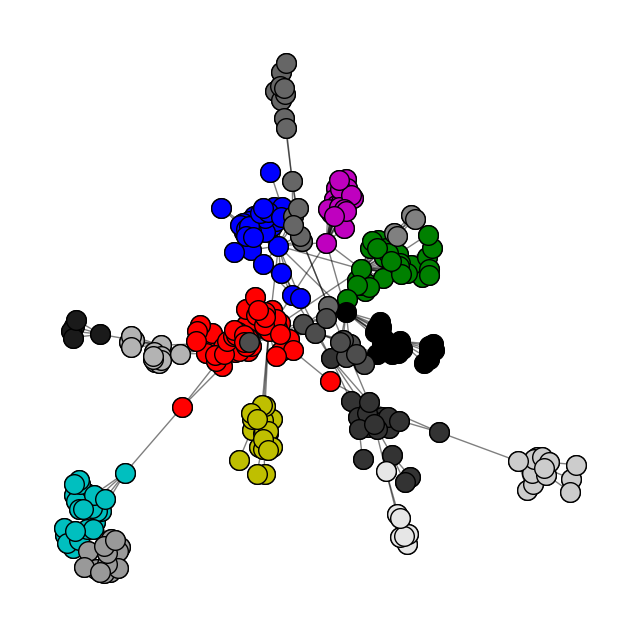

In [44]:
coms = algorithms.louvain(g)
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, coms, pos)

In [45]:
m1 = evaluation.erdos_renyi_modularity(g, coms)
m2 = evaluation.link_modularity(g, coms)
m3 = evaluation.modularity_density(g, coms)
m4 = evaluation.newman_girvan_modularity(g, coms)
m5 = evaluation.z_modularity(g, coms)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

0.8848157925550962
0.10614383563454184
120.08316738816738
0.8771215217436715
3.1091161345458485


In [46]:
ae = evaluation.avg_embeddedness(g, coms)
aid = evaluation.average_internal_degree(g, coms)
at = evaluation.avg_transitivity(g, coms)
c = evaluation.conductance(g, coms)
cr = evaluation.cut_ratio(g, coms)
ei = evaluation.edges_inside(g, coms)
ex = evaluation.expansion(g, coms)
fomd = evaluation.fraction_over_median_degree(g, coms)
ied = evaluation.internal_edge_density(g, coms)
nc = evaluation.normalized_cut(g, coms)
modf = evaluation.max_odf(g, coms)
aodf = evaluation.avg_odf(g, coms)
fodf = evaluation.flake_odf(g, coms)
sd = evaluation.scaled_density(g, coms)
sz = evaluation.size(g, coms)
tpr = evaluation.triangle_participation_ratio(g, coms)

print(ae.score)
print(aid.score)
print(at.score)
print(c.score)
print(cr.score)
print(ei.score)
print(ex.score)
print(fomd.score)
print(ied.score)
print(nc.score)
print(modf.score)
print(aodf.score)
print(fodf.score)
print(sd.score)
print(sz.score)
print(tpr.score)

0.9679338003137647
7.833214285714286
0.7559589872924937
0.04384831158607078
0.0010806012369506388
84.4375
0.32801632395382396
0.3318831168831169
0.5832770717092505
0.046253473788946356
3.6875
0.32801632395382396
0.0
21.65036228415143
20.1875
0.9022700968013468


In [47]:
# Frozen graph can't be modified
# coms = algorithms.markov_clustering(g)
# pos = nx.spring_layout(g)
# viz.plot_network_clusters(g, coms, pos)

In [48]:
# m1 = evaluation.erdos_renyi_modularity(g, coms)
# m2 = evaluation.link_modularity(g, coms)
# m3 = evaluation.modularity_density(g, coms)
# m4 = evaluation.newman_girvan_modularity(g, coms)
# m5 = evaluation.z_modularity(g, coms)

# print(m1.score)
# print(m2.score)
# print(m3.score)
# print(m4.score)
# print(m5.score)

In [49]:
# ae = evaluation.avg_embeddedness(g, coms)
# aid = evaluation.average_internal_degree(g, coms)
# at = evaluation.avg_transitivity(g, coms)
# c = evaluation.conductance(g, coms)
# cr = evaluation.cut_ratio(g, coms)
# ei = evaluation.edges_inside(g, coms)
# ex = evaluation.expansion(g, coms)
# fomd = evaluation.fraction_over_median_degree(g, coms)
# ied = evaluation.internal_edge_density(g, coms)
# nc = evaluation.normalized_cut(g, coms)
# modf = evaluation.max_odf(g, coms)
# aodf = evaluation.avg_odf(g, coms)
# fodf = evaluation.flake_odf(g, coms)
# sd = evaluation.scaled_density(g, coms)
# sz = evaluation.size(g, coms)
# tpr = evaluation.triangle_participation_ratio(g, coms)

# print(ae.score)
# print(aid.score)
# print(at.score)
# print(c.score)
# print(cr.score)
# print(ei.score)
# print(ex.score)
# print(fomd.score)
# print(ied.score)
# print(nc.score)
# print(modf.score)
# print(aodf.score)
# print(fodf.score)
# print(sd.score)
# print(sz.score)
# print(tpr.score)

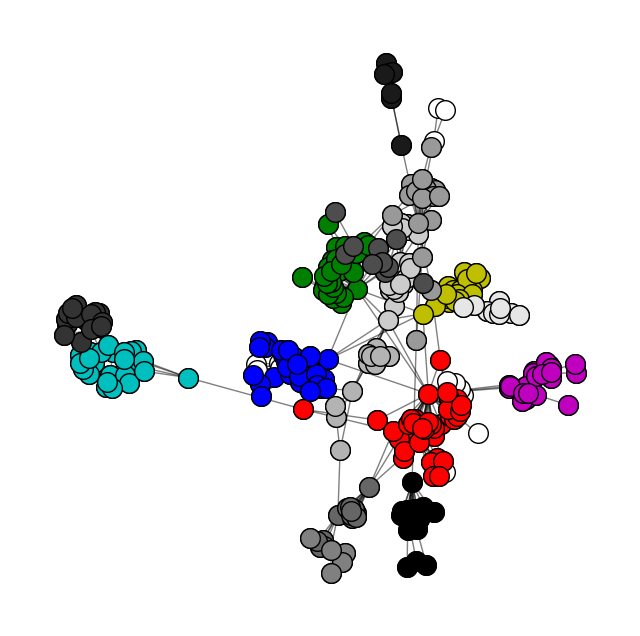

In [50]:
coms = algorithms.rber_pots(g)
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, coms, pos)

In [51]:
m1 = evaluation.erdos_renyi_modularity(g, coms)
m2 = evaluation.link_modularity(g, coms)
m3 = evaluation.modularity_density(g, coms)
m4 = evaluation.newman_girvan_modularity(g, coms)
m5 = evaluation.z_modularity(g, coms)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

0.8870428781472455
0.10511135317348956
134.61524044431022
0.8743359617200114
3.17206252176957


In [52]:
ae = evaluation.avg_embeddedness(g, coms)
aid = evaluation.average_internal_degree(g, coms)
at = evaluation.avg_transitivity(g, coms)
c = evaluation.conductance(g, coms)
cr = evaluation.cut_ratio(g, coms)
ei = evaluation.edges_inside(g, coms)
ex = evaluation.expansion(g, coms)
fomd = evaluation.fraction_over_median_degree(g, coms)
ied = evaluation.internal_edge_density(g, coms)
nc = evaluation.normalized_cut(g, coms)
modf = evaluation.max_odf(g, coms)
aodf = evaluation.avg_odf(g, coms)
fodf = evaluation.flake_odf(g, coms)
sd = evaluation.scaled_density(g, coms)
sz = evaluation.size(g, coms)
tpr = evaluation.triangle_participation_ratio(g, coms)

print(ae.score)
print(aid.score)
print(at.score)
print(c.score)
print(cr.score)
print(ei.score)
print(ex.score)
print(fomd.score)
print(ied.score)
print(nc.score)
print(modf.score)
print(aodf.score)
print(fodf.score)
print(sd.score)
print(sz.score)
print(tpr.score)

0.8997915474293362
6.359922495210665
0.5591807810109145
0.1100119454961042
0.001623788315765117
58.30434782608695
0.5070859541536994
0.2613250079883042
0.6566866641891539
0.11200783539700651
3.0869565217391304
0.5070859541536994
0.0
24.375215273253797
14.043478260869565
0.6651441955789782


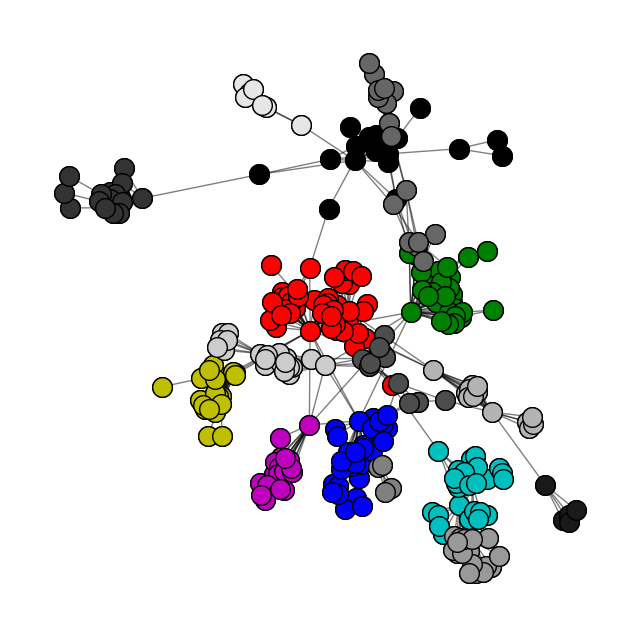

In [53]:
coms = algorithms.rb_pots(g)
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, coms, pos)

In [54]:
m1 = evaluation.erdos_renyi_modularity(g, coms)
m2 = evaluation.link_modularity(g, coms)
m3 = evaluation.modularity_density(g, coms)
m4 = evaluation.newman_girvan_modularity(g, coms)
m5 = evaluation.z_modularity(g, coms)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

0.8853734526900885
0.1061438357413306
120.10330344258915
0.8774598138069016
3.1157895193227323


In [55]:
ae = evaluation.avg_embeddedness(g, coms)
aid = evaluation.average_internal_degree(g, coms)
at = evaluation.avg_transitivity(g, coms)
c = evaluation.conductance(g, coms)
cr = evaluation.cut_ratio(g, coms)
ei = evaluation.edges_inside(g, coms)
ex = evaluation.expansion(g, coms)
fomd = evaluation.fraction_over_median_degree(g, coms)
ied = evaluation.internal_edge_density(g, coms)
nc = evaluation.normalized_cut(g, coms)
modf = evaluation.max_odf(g, coms)
aodf = evaluation.avg_odf(g, coms)
fodf = evaluation.flake_odf(g, coms)
sd = evaluation.scaled_density(g, coms)
sz = evaluation.size(g, coms)
tpr = evaluation.triangle_participation_ratio(g, coms)

print(ae.score)
print(aid.score)
print(at.score)
print(c.score)
print(cr.score)
print(ei.score)
print(ex.score)
print(fomd.score)
print(ied.score)
print(nc.score)
print(modf.score)
print(aodf.score)
print(fodf.score)
print(sd.score)
print(sz.score)
print(tpr.score)

0.9675196372632172
7.833886054421769
0.7556957040269832
0.04376810759718026
0.0010787663667592158
84.4375
0.3274295892599464
0.33155148423005565
0.5823938368363539
0.04617294239733948
3.625
0.3274295892599464
0.0
21.61757794218481
20.1875
0.9011859131278774


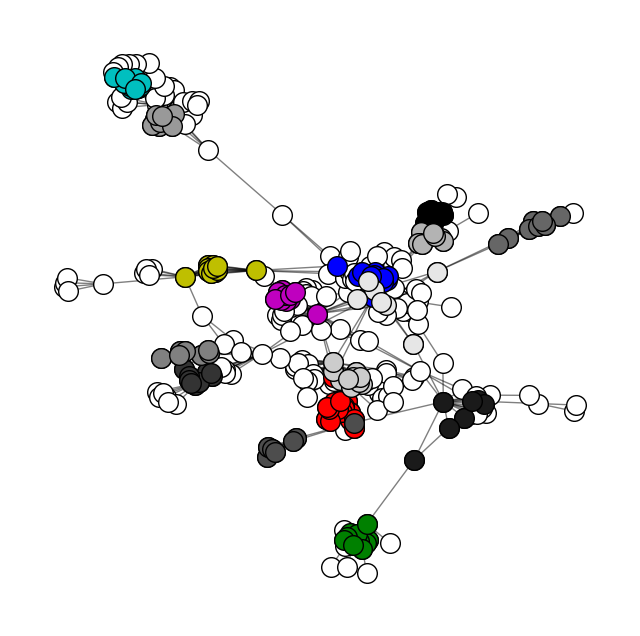

In [56]:
coms = algorithms.significance_communities(g)
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, coms, pos)

In [57]:
m1 = evaluation.erdos_renyi_modularity(g, coms)
m2 = evaluation.link_modularity(g, coms)
m3 = evaluation.modularity_density(g, coms)
m4 = evaluation.newman_girvan_modularity(g, coms)
m5 = evaluation.z_modularity(g, coms)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

0.7517636624571283
0.07816276771676099
191.22196969696972
0.7325796145406483
3.8171983461984014


In [58]:
ae = evaluation.avg_embeddedness(g, coms)
aid = evaluation.average_internal_degree(g, coms)
at = evaluation.avg_transitivity(g, coms)
c = evaluation.conductance(g, coms)
cr = evaluation.cut_ratio(g, coms)
ei = evaluation.edges_inside(g, coms)
ex = evaluation.expansion(g, coms)
fomd = evaluation.fraction_over_median_degree(g, coms)
ied = evaluation.internal_edge_density(g, coms)
nc = evaluation.normalized_cut(g, coms)
modf = evaluation.max_odf(g, coms)
aodf = evaluation.avg_odf(g, coms)
fodf = evaluation.flake_odf(g, coms)
sd = evaluation.scaled_density(g, coms)
sz = evaluation.size(g, coms)
tpr = evaluation.triangle_participation_ratio(g, coms)

print(ae.score)
print(aid.score)
print(at.score)
print(c.score)
print(cr.score)
print(ei.score)
print(ex.score)
print(fomd.score)
print(ied.score)
print(nc.score)
print(modf.score)
print(aodf.score)
print(fodf.score)
print(sd.score)
print(sz.score)
print(tpr.score)

0.6944446129526434
4.31982233044733
0.3479422908926585
0.3311396267005522
0.0060525483386484474
13.5
1.9295477092352094
0.133648088023088
1.4831580347756819
0.3340496274870103
4.4125
1.9295477092352094
0.1200401334776335
55.05258192893632
4.0375
0.38937499999999997


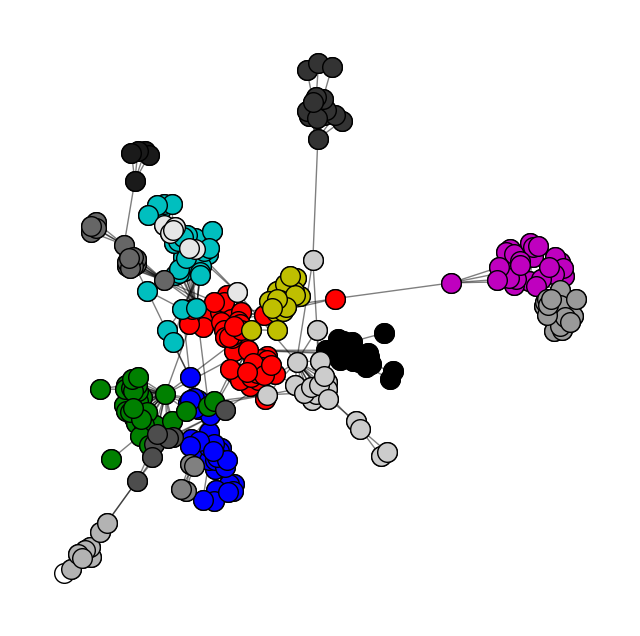

In [59]:
coms = algorithms.spinglass(g)
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, coms, pos)

In [60]:
m1 = evaluation.erdos_renyi_modularity(g, coms)
m2 = evaluation.link_modularity(g, coms)
m3 = evaluation.modularity_density(g, coms)
m4 = evaluation.newman_girvan_modularity(g, coms)
m5 = evaluation.z_modularity(g, coms)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

0.8832220092501939
0.10624708535082197
120.58170729679945
0.8758063094526649
3.0723672812166027


In [61]:
ae = evaluation.avg_embeddedness(g, coms)
aid = evaluation.average_internal_degree(g, coms)
at = evaluation.avg_transitivity(g, coms)
c = evaluation.conductance(g, coms)
cr = evaluation.cut_ratio(g, coms)
ei = evaluation.edges_inside(g, coms)
ex = evaluation.expansion(g, coms)
fomd = evaluation.fraction_over_median_degree(g, coms)
ied = evaluation.internal_edge_density(g, coms)
nc = evaluation.normalized_cut(g, coms)
modf = evaluation.max_odf(g, coms)
aodf = evaluation.avg_odf(g, coms)
fodf = evaluation.flake_odf(g, coms)
sd = evaluation.scaled_density(g, coms)
sz = evaluation.size(g, coms)
tpr = evaluation.triangle_participation_ratio(g, coms)

print(ae.score)
print(aid.score)
print(at.score)
print(c.score)
print(cr.score)
print(ei.score)
print(ex.score)
print(fomd.score)
print(ied.score)
print(nc.score)
print(modf.score)
print(aodf.score)
print(fodf.score)
print(sd.score)
print(sz.score)
print(tpr.score)

0.9466497249050835
7.476131156274827
0.7190471656778549
0.06299993334846175
0.001246124383688718
79.52941176470588
0.38308955058074057
0.32815469296222893
0.5923534118796558
0.06522154555634842
3.235294117647059
0.38308955058074057
0.0
21.98726229691488
19.0
0.8539387341772812


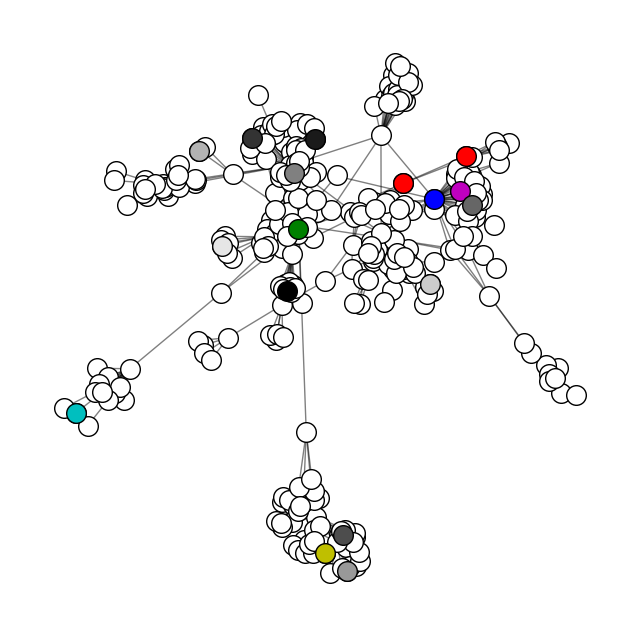

In [62]:
coms = algorithms.surprise_communities(g)
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, coms, pos)

In [63]:
m1 = evaluation.erdos_renyi_modularity(g, coms)
m2 = evaluation.link_modularity(g, coms)
m3 = evaluation.modularity_density(g, coms)
m4 = evaluation.newman_girvan_modularity(g, coms)
m5 = evaluation.z_modularity(g, coms)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

0.2312441536378172
0.00010325408547578666
-1506.0
0.22689106027559555
3.4388464504491423


In [64]:
ae = evaluation.avg_embeddedness(g, coms)
aid = evaluation.average_internal_degree(g, coms)
at = evaluation.avg_transitivity(g, coms)
c = evaluation.conductance(g, coms)
cr = evaluation.cut_ratio(g, coms)
ei = evaluation.edges_inside(g, coms)
ex = evaluation.expansion(g, coms)
fomd = evaluation.fraction_over_median_degree(g, coms)
ied = evaluation.internal_edge_density(g, coms)
nc = evaluation.normalized_cut(g, coms)
modf = evaluation.max_odf(g, coms)
aodf = evaluation.avg_odf(g, coms)
fodf = evaluation.flake_odf(g, coms)
sd = evaluation.scaled_density(g, coms)
sz = evaluation.size(g, coms)
tpr = evaluation.triangle_participation_ratio(g, coms)

print(ae.score)
print(aid.score)
print(at.score)
print(c.score)
print(cr.score)
print(ei.score)
print(ex.score)
print(fomd.score)
print(ied.score)
print(nc.score)
print(modf.score)
print(aodf.score)
print(fodf.score)
print(sd.score)
print(sz.score)
print(tpr.score)

0.3086131645587039
2.0031055900621118
0.0
0.691431201013612
0.020745817539778486
1.0062111801242235
6.680124223602484
0.0
0.009316770186335404
0.69381071451412
6.683229813664596
6.680124223602484
0.8307453416149069
0.34582441113490364
1.0031055900621118
0.0


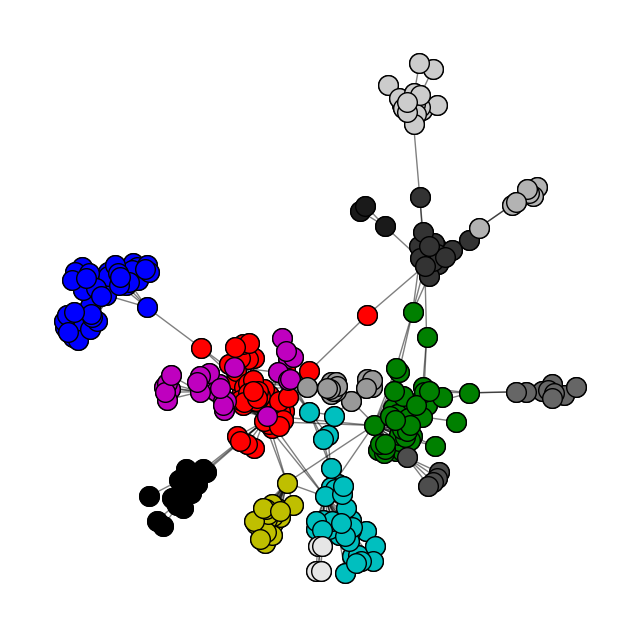

In [65]:
coms = algorithms.walktrap(g)
pos = nx.spring_layout(g)
viz.plot_network_clusters(g, coms, pos)

In [66]:
m1 = evaluation.erdos_renyi_modularity(g, coms)
m2 = evaluation.link_modularity(g, coms)
m3 = evaluation.modularity_density(g, coms)
m4 = evaluation.newman_girvan_modularity(g, coms)
m5 = evaluation.z_modularity(g, coms)

print(m1.score)
print(m2.score)
print(m3.score)
print(m4.score)
print(m5.score)

0.8794871728355098
0.10779577486964902
110.76993752859605
0.8729458564571754
2.874569055630773


In [67]:
ae = evaluation.avg_embeddedness(g, coms)
aid = evaluation.average_internal_degree(g, coms)
at = evaluation.avg_transitivity(g, coms)
c = evaluation.conductance(g, coms)
cr = evaluation.cut_ratio(g, coms)
ei = evaluation.edges_inside(g, coms)
ex = evaluation.expansion(g, coms)
fomd = evaluation.fraction_over_median_degree(g, coms)
ied = evaluation.internal_edge_density(g, coms)
nc = evaluation.normalized_cut(g, coms)
modf = evaluation.max_odf(g, coms)
aodf = evaluation.avg_odf(g, coms)
fodf = evaluation.flake_odf(g, coms)
sd = evaluation.scaled_density(g, coms)
sz = evaluation.size(g, coms)
tpr = evaluation.triangle_participation_ratio(g, coms)

print(ae.score)
print(aid.score)
print(at.score)
print(c.score)
print(cr.score)
print(ei.score)
print(ex.score)
print(fomd.score)
print(ied.score)
print(nc.score)
print(modf.score)
print(aodf.score)
print(fodf.score)
print(sd.score)
print(sz.score)
print(tpr.score)

0.9731383314078896
7.627034637953337
0.7044107437826026
0.03659765196036367
0.0007983759867706744
91.13333333333334
0.24237213604693283
0.3285950145055836
0.6691193834638421
0.03837329542304445
2.6666666666666665
0.24237213604693283
0.0
24.83669899947908
21.533333333333335
0.8410848801499209
